# "Digit Recognizer" Kaggle Exercise

https://www.kaggle.com/c/digit-recognizer

### Overview

The MNIST dataset is a collection of 60,000 labelled 28px x 28px images of hand-written digits - from 0-9. It is the "hello-world" of neural networks for computer vision. I will use it to classify my own handwritten digit.

#### Initial Method was to use a SVM/SVC - this was too slow!
I switched over to Convolutional Neural Networks

### Method

* Import the libraries
* Load the data
* Explore the data - visualise
* Create the graph
* Create the session - train the model
* Make a prediction
* Test the model in the wild

# Code

### Imports

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy

### Load the data

In [2]:
train_set = pd.read_csv("./train.csv")
test_set = pd.read_csv("./test.csv")

print((train_set.values))

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [7 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]]


The 60k images are split into train (42K) & test (28K). 
The Train CSV file contains rows comprised of the label for the digit and a grayscale value for each of the 784 pixels for that image. The Test CSV file contains the pixel information, but has no attached label.

### Explore the data

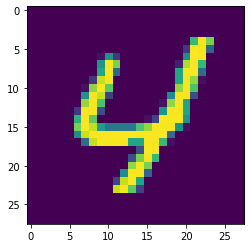

In [3]:
single_image = (train_set.iloc[450, 1:]).values # Extract a single row, convert to array

single_image = single_image.reshape(28,28)
plt.imshow(single_image)

### Make the data usable

In [4]:
X_train = (train_set.iloc[:, 1:]).values # Drop label & convert to array
y_train = (train_set.iloc[:,0]).values # (Drop label)' & convert to array
print("\n")
print("X_train")
print(X_train)
print("\n")
print("y_train")
print(y_train)


X_test = (test_set.iloc[:, 1:]).values # Drop label & convert to array
print("\n")
print("X_test")
print(X_test)


# One-Hot Encode y_train
y_train = pd.get_dummies(y_train)
y_train = (y_train.iloc[:, 0:]).values
print("\n")
print("y_train One-Hot Encoded")
print(y_train)



X_train
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


y_train
[1 0 1 ... 7 6 9]


X_test
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


y_train One-Hot Encoded
[[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


### Helper functions

#### init_weights & init_bias
Initialize random weights & biases for the fully connected or convolutional layers.

#### conv2d

#### max_pool_2by2

#### convolutional_layer

#### normal_full_layer

#### next_batch


In [5]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')

def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x, W) + b)

def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

def next_batch(item, labels, batch_size):
    batch_x = []
    batch_y = []
    for i in range(0,batch_size):
        random_index = random.randint(0,len(X_train) - 1)
        batch_x.append(item[random_index])
        batch_y.append(labels[random_index])
    return numpy.asarray(batch_x), numpy.asarray(batch_y)
        

### Create the graph

#### Placeholder

In [6]:
x = tf.placeholder(tf.float32,shape=[None,784])
y_true = tf.placeholder(tf.float32,shape=[None,10])

#### Layers

In [7]:
x_image = tf.reshape(x,[-1,28,28,1])

convo_1 = convolutional_layer(x_image,shape=[6,6,1,32])
convo_1_pooling = max_pool_2by2(convo_1)

convo_2 = convolutional_layer(convo_1_pooling,shape=[6,6,32,64])
convo_2_pooling = max_pool_2by2(convo_2)

convo_2_flat = tf.reshape(convo_2_pooling,[-1,7*7*64])
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat,1024))

hold_prob = tf.placeholder(tf.float32)
full_one_dropout = tf.nn.dropout(full_layer_one,rate=1-hold_prob)

y_pred = normal_full_layer(full_one_dropout,10)

#### Loss Function

In [8]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y_pred))

#tf.cast?!?!?!

W1013 15:46:21.928543 140735502422912 deprecation.py:323] From <ipython-input-8-5e21ba9c3c4e>:1: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



#### Optimizer

In [9]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)
train = optimizer.minimize(cross_entropy)

#### Initialize Variables

In [10]:
init = tf.global_variables_initializer()

### Create the session

In [ ]:
steps = 5000

with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(steps):
        
        batch_x , batch_y = next_batch(X_train, y_train, 5)
        
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y,hold_prob:0.5})
        
        # PRINT OUT A MESSAGE EVERY 100 STEPS
        if i%100 == 0:
            
            print('Currently on step {}'.format(i))
            print('Accuracy is:')
            # Test the Train Model
            matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))

            acc = tf.reduce_mean(tf.cast(matches,tf.float32))

            print(sess.run(acc,feed_dict={x:X_test,y_true:y_test,hold_prob:1.0}))
            print('\n')
            

In [ ]:
######## There is no y_test!!!!!! what could is that going to do?!
### Why doies the kernel die???
#### Why does the Udmney one work???Q?Q

In [ ]:
# My model in the wild

# Load the digit
# View the image
# Convert to gray-scale
# Crop to 28x by 28px
# View the cleansed image
# Convert to array, Flatten to 784 by 1
# Make a prediction using the model
